In [1]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn')

In [2]:
dfx=pd.read_csv('Logistic_X_Train.csv')
dfx.head()

,f1,f2,f3
0,-1.239375,0.749101,-0.528515
1,-1.036070,0.801436,-1.283712
2,-0.615579,1.579521,-1.391927
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603


In [3]:
dfy=pd.read_csv('Logistic_Y_Train.csv')
dfy.head()

,label
0,1
1,1
2,1
3,0
4,0


In [4]:
#Converting dataframe into iterable numpy object array
x=np.c_[dfx['f1'],dfx['f2'],dfx['f3']]
val_x1=dfx['f1'].values
val_x2=dfx['f2'].values
val_x3=dfx['f3'].values
x

array([[-1.23937466,  0.74910149, -0.52851491],
       [-1.03607028,  0.80143631, -1.28371152],
       [-0.61557914,  1.57952053, -1.39192706],
       ...,
       [ 0.08827657,  1.63878904, -2.19364056],
       [ 1.52515501,  0.85923429,  1.50530791],
       [-0.97981744,  0.56395376, -1.53939416]])

In [5]:
y=dfy.values
y.reshape(-1)
y

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

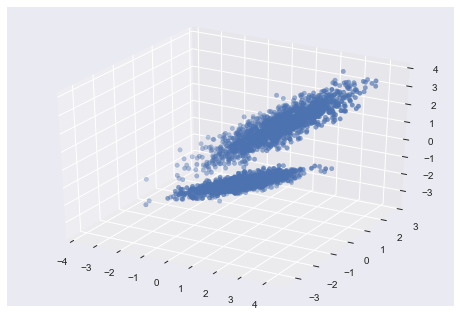

In [6]:
#there are 3 features given
#so the graph is plotted in 3d for perfect visualisation
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(val_x2,val_x3,val_x1,  cmap='hsv')
plt.show()

# Algorithm

In [7]:
#we have to find a line or hyperplane which is best in classifying the given data
#the eqn of line is ax1+bx2+c=0
#the weight matrix w=[a b], the bias is b=c
def hypothesis(x,w,b):
    hx = np.dot(x,w)+b #the eqn ax1+bx2+c can be written as dot product of x,w and add b to it
    return sigmoid(hx)

In [8]:
#the sigmoid function is
#h(x)=1.0/(1.0+pow(e,-x))
def sigmoid(h):
    return 1.0/(1.0 + np.exp(-1.0*h))

In [9]:
#the probability function p(y=1,x,theta) is h(x)
#the probability function p(y=0,x,theta) is (1-h(x))
#the probability that points lie far from the line equal to product of individual probabilities of the points
#the generalised probability fuction is p(y,x,theta)/L(theta) = pow(h(x),y)*pow((1-h(x)),(1-y))
#the log of above function is Log(l(theta)) y*log(h(x))+(1-y)*log(1-h(x))
#Log(L(theta)) function is also known as log likelihood function of theta
def error(y,x,w,b):
    m = x.shape[0]
    err = 0.0
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        err += y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx)
    return err/m

In [10]:
#J(theta)=(ax1+bx2+cx3+d-y)
def get_grad(x,w,b,y):
    grad_b = 0.0
    grad_w = np.zeros(w.shape)
    m = x.shape[0]
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        grad_w += (y[i] - hx)*x[i] #the eqn is obtained by partially differentiating J(theta) w.r.t weight matrix(w)
        grad_b +=  (y[i]-hx) #the eqn is obtained by partially differentiating J(theta) w.r.t bias(b)
    
    grad_w /=m
    grad_b /=m
    return [grad_w,grad_b]

In [11]:
#here gradient ascent is used as log of probability function is concave function
#Log(L(theta))=y*log(h(x))+(1-y)*log(1-h(x))
#in order to calculate gradient descendent negative of log(L(theta)) is considered it means negative log likelihood function of theta
def gradient_ascent(x,y,w,b,learning_rate=0.01):
    err = error(y,x,w,b)
    [grad_w,grad_b] = get_grad(x,w,b,y)
    w += learning_rate*grad_w
    b += learning_rate*grad_b
    return err,w,b

In [12]:
#if the predicted value is less than 0.5 it belongs to class 0 else it belongs to class 1
def predict(x,w,b):   
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1

In [13]:
#function to calculate the accuracy of the algorithm
def get_acc(x_tst,y_tst,w,b):
    y_pred = []
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)  
    y_pred = np.array(y_pred)
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]

In [14]:
#generating random weight and bias matrices
#initial weight and bias matrices are taken 0
loss = [] #loss list consists of error calculated for each point
acc = []

W = np.zeros(x.shape[1])
b = 0

In [15]:
for i in range(1000):#1000 iterations
    l,W,b = gradient_ascent(x,y,W,b,learning_rate=0.1)
    loss.append(l)
    print(l)

[-1.]
[-0.9297615]
[-0.86858357]
[-0.81511858]
[-0.76819008]
[-0.72679668]
[-0.69009861]
[-0.65739693]
[-0.62811149]
[-0.60176052]
[-0.57794291]
[-0.55632348]
[-0.53662083]
[-0.51859766]
[-0.50205278]
[-0.48681483]
[-0.4727371]
[-0.45969345]
[-0.44757488]
[-0.43628681]
[-0.42574683]
[-0.41588286]
[-0.4066316]
[-0.39793726]
[-0.38975052]
[-0.38202761]
[-0.37472959]
[-0.36782168]
[-0.36127276]
[-0.35505489]
[-0.34914294]
[-0.34351421]
[-0.3381482]
[-0.33302631]
[-0.32813165]
[-0.32344884]
[-0.31896386]
[-0.31466389]
[-0.31053719]
[-0.306573]
[-0.30276141]
[-0.29909333]
[-0.29556036]
[-0.29215475]
[-0.28886934]
[-0.28569748]
[-0.28263301]
[-0.27967024]
[-0.27680383]
[-0.27402884]
[-0.27134066]
[-0.26873499]
[-0.26620781]
[-0.26375535]
[-0.26137409]
[-0.25906074]
[-0.25681219]
[-0.25462553]
[-0.25249803]
[-0.25042712]
[-0.24841038]
[-0.24644551]
[-0.24453036]
[-0.24266291]
[-0.24084121]
[-0.23906346]
[-0.23732792]
[-0.23563298]
[-0.23397708]
[-0.23235876]
[-0.23077661]
[-0.22922933]
[-0.22

[-0.09003676]
[-0.08997692]
[-0.08991725]
[-0.08985774]
[-0.08979838]
[-0.08973919]
[-0.08968015]
[-0.08962128]
[-0.08956256]
[-0.089504]
[-0.08944559]
[-0.08938734]
[-0.08932925]
[-0.08927131]
[-0.08921352]
[-0.08915588]
[-0.0890984]
[-0.08904107]
[-0.08898389]
[-0.08892686]
[-0.08886998]
[-0.08881325]
[-0.08875667]
[-0.08870023]
[-0.08864395]
[-0.08858781]
[-0.08853181]
[-0.08847597]
[-0.08842026]
[-0.08836471]
[-0.08830929]
[-0.08825402]
[-0.08819889]
[-0.0881439]
[-0.08808906]
[-0.08803435]
[-0.08797979]
[-0.08792536]
[-0.08787108]
[-0.08781693]
[-0.08776292]
[-0.08770905]
[-0.08765532]
[-0.08760172]
[-0.08754826]
[-0.08749493]
[-0.08744174]
[-0.08738868]
[-0.08733576]
[-0.08728297]
[-0.08723031]
[-0.08717779]
[-0.08712539]
[-0.08707313]
[-0.087021]
[-0.086969]
[-0.08691713]
[-0.08686538]
[-0.08681377]
[-0.08676228]
[-0.08671092]
[-0.08665969]
[-0.08660859]
[-0.08655761]
[-0.08650676]
[-0.08645603]
[-0.08640543]
[-0.08635495]
[-0.08630459]
[-0.08625436]
[-0.08620425]
[-0.08615427]


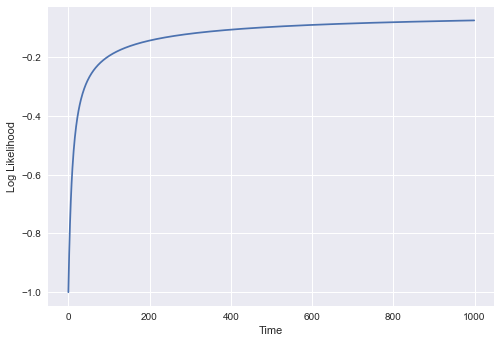

In [16]:
plt.plot(loss)
plt.ylabel("Log Likelihood")
plt.xlabel("Time")
plt.show()

In [17]:
dfx1 = pd.read_csv("Logistic_X_Test.csv")
dfx1.head()

,f1,f2,f3
0,-0.767508,-0.261859,-2.514831
1,-1.241653,1.449001,-0.413089
2,1.925270,1.931761,1.342619
3,-1.298255,1.049761,-0.527319
4,-0.964712,0.938088,-1.186328


In [18]:
x1=np.c_[dfx1['f1'],dfx1['f2'],dfx1['f3']]
val1_x1=dfx['f1'].values
val1_x2=dfx['f2'].values
val1_x3=dfx['f3'].values

# Plotting the hyperplane acquired

## Training data

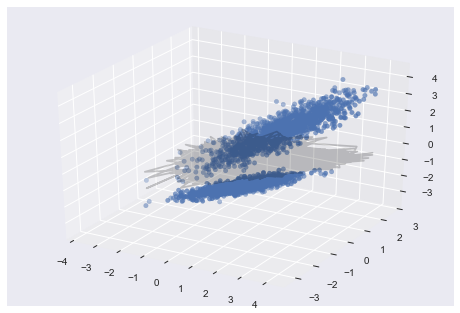

In [19]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(val_x2,val_x3,val_x1,  cmap='hsv')

x_train = val_x2
y_train = val_x3
z_train = -((W[1]*x_train + W[2]*y_train + b)/W[0])
ax.plot3D(x_train,y_train,z_train,color = 'k',alpha = 0.2)
plt.show()

## Testing Data

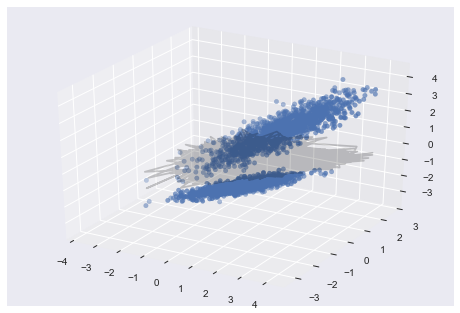

In [20]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(val1_x2,val1_x3,val1_x1,  cmap='hsv')

x_test = val1_x2
y_test = val1_x3
z_test = (-(W[1]*x_test + W[2]*y_test + b)/W[0])

ax.plot3D(x_test,y_test,z_test,color = 'k',alpha = 0.2)
plt.show()